In [1]:
from vcat import ImageData

Thank you for using VCAT. Have fun with VLBI!
If you are using this package please cite VCAT Team et al. 2025 ....


In [2]:
#Let's load some data first

data=ImageData("../dataset_example/3C111_U_2014_05_08/3C111_U_2014_05_08.fits") #This is the Stokes I .fits file

#print some basic info
print(data)


Image of the source 3C111 at frequency 15.2 GHz on 2014-05-08 
    Total cleaned flux: 3474.345 mJy 
    Image Noise: 0.252 mJy using method 'Histogram Fit'
No polarization data loaded.
No model loaded. Clean model info: 
    Model Flux: 3474.345 mJy 
    Number of Components: 1464


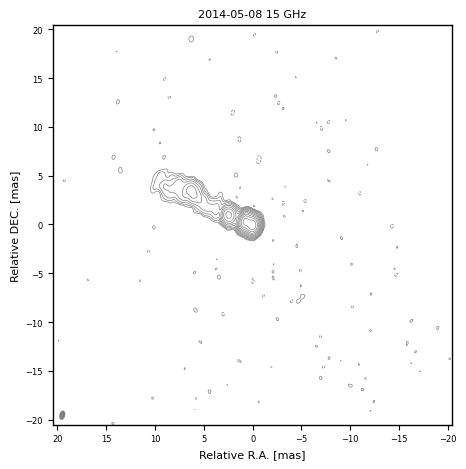

In [3]:
#Let's start with a simple plot of the total intensity contours
data.plot()

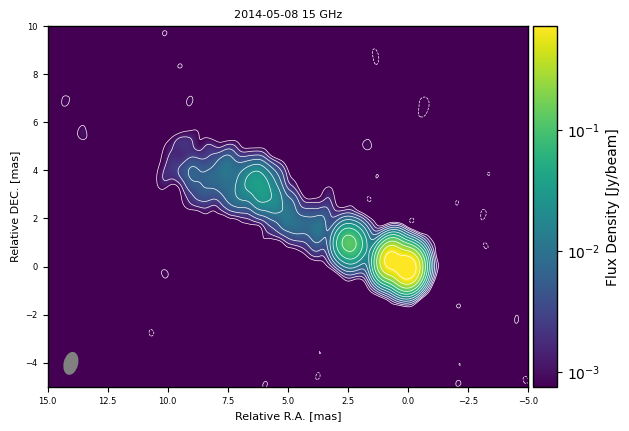

In [4]:
#let's make some adjustments and plot it again
#We will choose custom xlim and ylim
xlim=[15,-5]
ylim=[-5,10]
#let's activate a colormap
im_colormap=True
im_color="viridis"
#and also show a colorbar
do_colorbar=True
#we can also modify the significance level of the contour display
stokes_i_sigma_cut=3 #lowest contour will be 3*noise level

#Let's create the plot
data.plot(xlim=xlim,ylim=ylim,im_colormap=im_colormap,im_color=im_color,do_colorbar=do_colorbar)

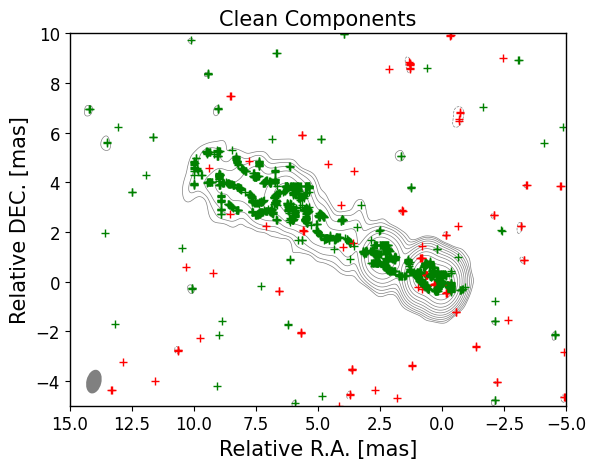

In [5]:
#If there is no explicit modelfit loaded, we can also plot the clean components
overplot_clean=True

#Let's also modify the plot title:
title="Clean Components"

#And change the font sizes
font_size_axis_tick=12
font_size_axis_title=15

#and plot it with clean components
data.plot(xlim=xlim,ylim=ylim,overplot_clean=True,title=title,
          font_size_axis_tick=font_size_axis_tick,font_size_axis_title=font_size_axis_title)

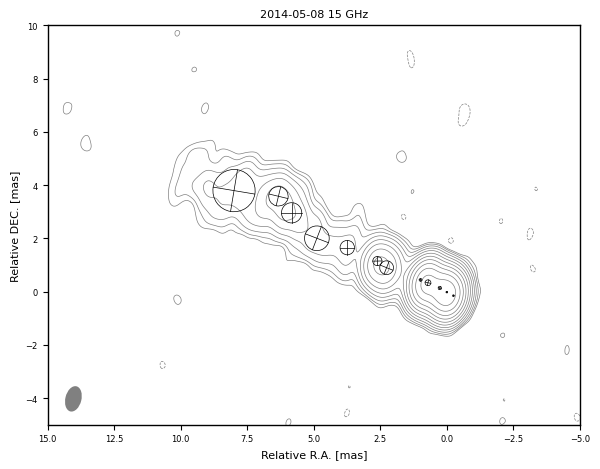

In [6]:
#We can also overplot model components of a modelfit
#To do this lets first load the data again, including modelfits

data=ImageData("../dataset_example/3C111_U_2014_05_08/3C111_U_2014_05_08.fits", #This is the Stokes I .fits file
               model="../dataset_example/3C111_U_2014_05_08/3C111_U_2014_05_08.mfit") #This is a modelfit .mod or .fits file

overplot_gauss=True
data.plot(xlim=xlim,ylim=ylim,overplot_gauss=overplot_gauss)

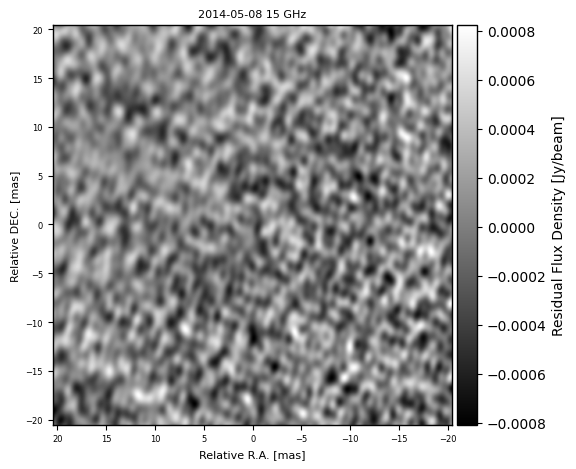

In [7]:
#It is also possible to plot the residual map, but this requires a .uvf file and DIFMAP

#Let's load the data again
data=ImageData("../dataset_example/3C111_U_2014_05_08/3C111_U_2014_05_08.fits", #This is the Stokes I .fits file
               uvf_file="../dataset_example/3C111_U_2014_05_08/3C111_U_2014_05_08.uvf", #This is the .uvf file
               difmap_path="/usr/local/difmap/uvf_difmap_2.5g") #DIFMAP Path

data.plot(plot_mode="residual",contour=False,do_colorbar=True,plot_beam=False)

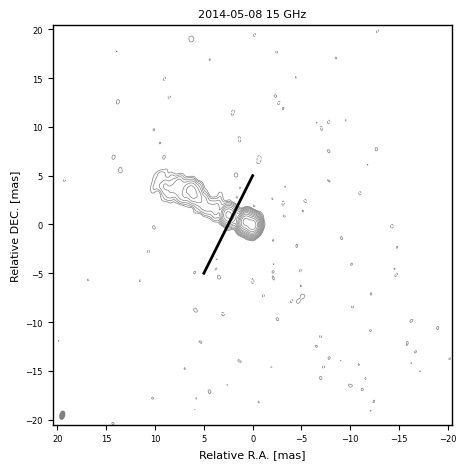

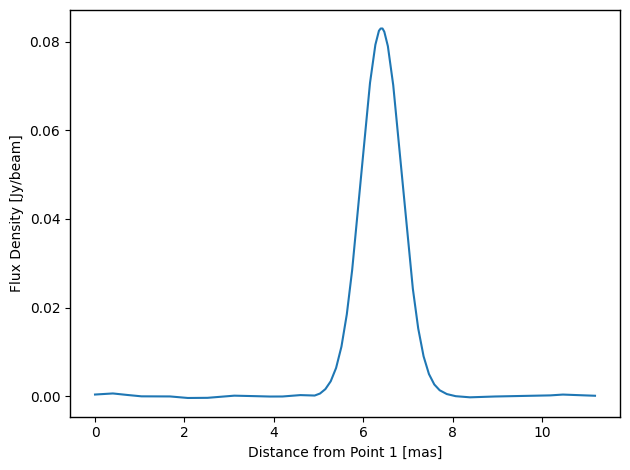

In [8]:
#We can also extract a profile between two points in the image
#Let's define two points
p1=(5,-5)
p2=(0,5)
plot_line=[p1,p2]

#plot the image, including the line
data.plot(plot_line=plot_line)

#Now extract the profile along this line (returns distance vs. flux density) 
x,y=data.get_profile(p1,p2,show=True)

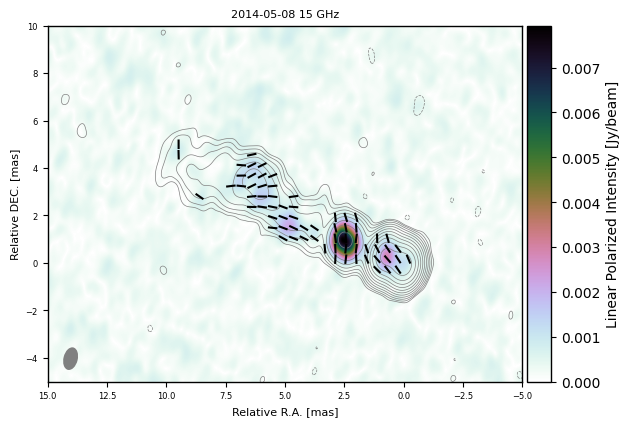

In [9]:
#Let's have a look at polarization plots and load the data with full polarization
data=ImageData("../dataset_example/3C111_U_2014_05_08/3C111_U_2014_05_08.fits", #This is the Stokes I .fits file
                stokes_q="../dataset_example/3C111_U_2014_05_08/3C111_U_2014_05_08.qcln", #This is a stokes Q .fits file
                stokes_u="../dataset_example/3C111_U_2014_05_08/3C111_U_2014_05_08.ucln") #This is a stokes U .fits file

#let's create a plot of linear polarization
plot_mode="lin_pol"
#We would also like to see the EVPAs
plot_evpa=True
evpa_color="black"
#we can also set the evpa grid and their length and width in pixels
evpa_width=1.5
evpa_len=10
evpa_distance=11

#let's plot the data
data.plot(xlim=xlim,ylim=ylim,plot_mode=plot_mode,plot_evpa=plot_evpa,evpa_color=evpa_color,
          evpa_width=evpa_width,evpa_len=evpa_len,evpa_distance=evpa_distance,do_colorbar=True)

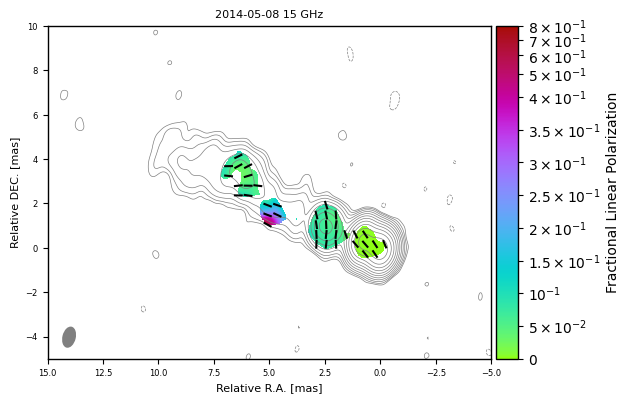

In [10]:
#additionally you can also plot fractional polarization maps

#let's create a plot of linear polarization
plot_mode="frac_pol"

#the areas where polarization is displayed is determined by two sigma cuts
stokes_i_sigma_cut=3
lin_pol_sigma_cut=5

#plots can be saved using the savefig parameter
savefig="plot.pdf"

#plot the data again
data.plot(xlim=xlim,ylim=ylim,plot_mode=plot_mode,plot_evpa=plot_evpa,evpa_color=evpa_color,
          stokes_i_sigma_cut=stokes_i_sigma_cut,lin_pol_sigma_cut=lin_pol_sigma_cut,savefig=savefig,
          evpa_width=evpa_width,evpa_len=evpa_len,evpa_distance=evpa_distance,do_colorbar=True)

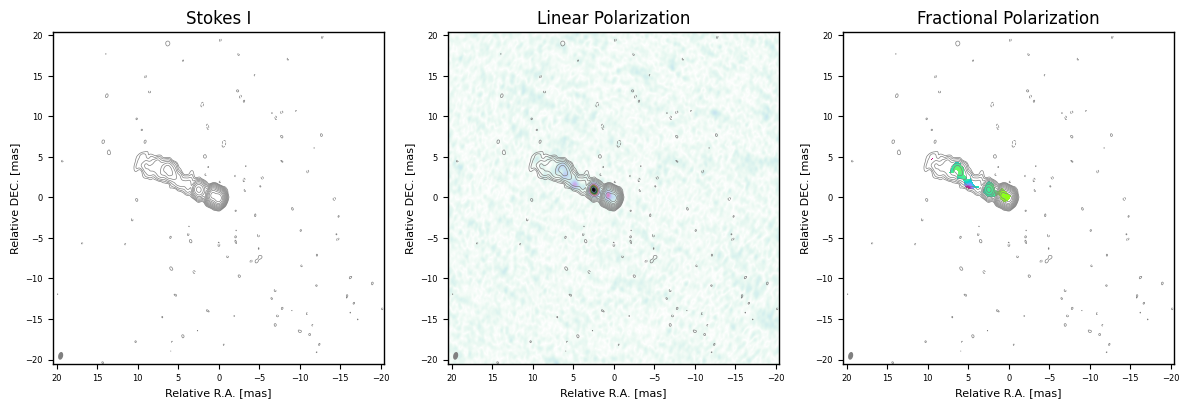

In [11]:
#Additionally, you are very flexible to also use the plots in larger grids or subplot structures
#Let's setup a subplot with three columns and one row using matplotlib
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, figsize=(12, 4))

#Let's say we want to plot Stokes I, Lin Pol and Frac Pol next to each other
#We can simply provide the fig and ax parameters to the plot() function and specify show=False

#Start with stokes I
data.plot(plot_mode="stokes_i",fig=fig,ax=axes[0],show=False)

#Plot Lin Pol
data.plot(plot_mode="lin_pol",fig=fig,ax=axes[1],show=False)

#Plot Frac pol
data.plot(plot_mode="frac_pol",fig=fig,ax=axes[2],show=False)

#Before Displaying the plot we can make additional manual changes by using regular matplotlib commands, for example:
axes[0].set_title("Stokes I")
axes[1].set_title("Linear Polarization")
axes[2].set_title("Fractional Polarization")

#Let's display the plot
plt.show()

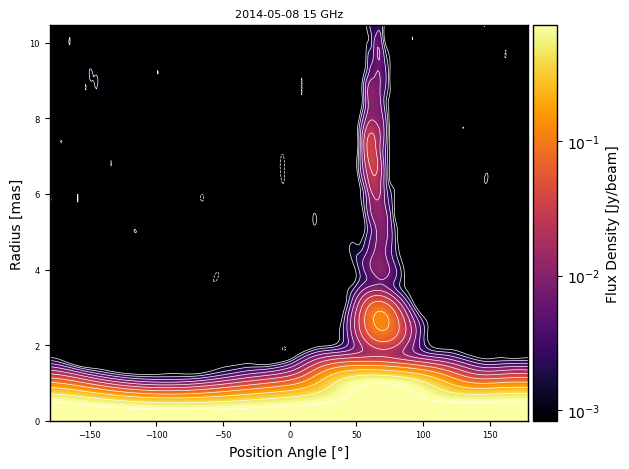

In [12]:
#Finally, it is also possible to plot the images in polar coordinates
data.plot(plot_polar=True,im_colormap=True,im_color="inferno",do_colorbar=True)

In [13]:
#For additional information on plots, please also see the ImageCubePlots Notebook!